## Multivariate Linear Regression with Iowa Housing Prices
This data has been pulled from https://jse.amstat.org/v19n3/decock.pdf, which is also found on the Andrew Ng Coursera Machine Learning course. 

This file is similar in structure to washington_housing_prices.ipynb, as both analyze their respective datasets in nearly identical ways. The reason they have been split instead of having one "master file" to analyze all housing datasets is because work is required to clean up each dataset before multivariate linear regression can be run on them. Thus, approximately half of each file is analysis and clean up (such as deleting columns, normalizing data, etc.) on its respective dataset. 

In [145]:
# Imports
import numpy as np
import pandas as pd

from multivariate_linear_regression import *

### Importing from iowa_housing_prices.csv

In [146]:
# Importing Data and Removing Irrelevant Columns
data = np.loadtxt("iowa_housing_prices.csv", delimiter=",", dtype=str)

# Moving Output Column to the End
data = np.roll(data, -1, axis = 1)

column_headings = np.array(["Size (sqft)","Number of Bedrooms", 
                            "Number of Floors", "Age of Home", 
                            "Price (1000s dollars)"])

# data = np.loadtxt("dumb_test_data.csv", delimiter=",", dtype=str, skiprows = 1)

column_headings = column_headings.astype(str)
data = data.astype(float)

# Saving the Number of Columns and Rows of the Data
num_columns = data[0, ...].size
num_rows = data[..., 0].size

### Graphs

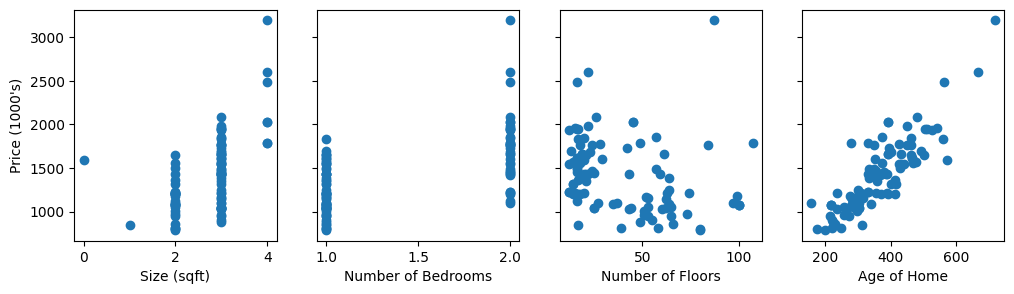

In [147]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots(1, 4, figsize=(12, 3), sharey=True)

for i in range(len(ax)):
    ax[i].scatter(data[:,i],data[:, num_columns - 1])
    ax[i].set_xlabel(column_headings[i])

ax[0].set_ylabel("Price (1000's)")
plt.show()

## Normalization

In [148]:
def normalize(data):
    num_columns = data[0, ...].size
    num_rows = data[..., 0].size
    column_ranges = np.array([])
    column_minimums = np.array([])

    for i in range(num_columns - 1):
        column_range = np.ptp(data[:, i])
        column_minimum = np.min(data[:, i])
        data[:, i] = (data[:, i] - column_minimum) / column_range

        column_ranges = np.append(column_ranges, [column_range])
        column_minimums = np.append(column_minimums, [column_minimum])
    
    return (data, column_minimums, column_ranges)

In [149]:
# Normalizing Data (Using Feature Scaling)
# We both normalize the data as well 

(data, column_minimums, column_ranges) = normalize(data)

# Creating Training Set and Test Set
training_data = data[0:int(num_rows/2), :]
test_data = data[int(num_rows/2):data.size, :]

# Output for Understanding
print("Number of Total Columns (Input Columns + 1 Output Price Column): ")
print(num_columns)
print("\n")

print("Number of Total Rows (Training + Test) (Number of Data Points): ")
print(num_rows)
print("\n")

print("Training Data: ")
print(training_data)
print("\n")

print("Test Data: ")
print(test_data)
print("\n")

Number of Total Columns (Input Columns + 1 Output Price Column): 
5


Number of Total Rows (Training + Test) (Number of Data Points): 
100


Training Data: 
[[5.00000000e-01 0.00000000e+00 5.57894737e-01 2.02606212e-01
  9.52000000e+02]
 [7.50000000e-01 0.00000000e+00 5.47368421e-01 2.53480900e-01
  1.24400000e+03]
 [7.50000000e-01 1.00000000e+00 5.26315789e-02 6.27990004e-01
  1.94700000e+03]
 [7.50000000e-01 1.00000000e+00 3.15789474e-01 4.21278115e-01
  1.72500000e+03]
 [7.50000000e-01 1.00000000e+00 3.15789474e-02 6.81899322e-01
  1.95900000e+03]
 [5.00000000e-01 0.00000000e+00 2.10526316e-02 4.58764727e-01
  1.31400000e+03]
 [5.00000000e-01 0.00000000e+00 5.68421053e-01 1.28525527e-01
  8.64000000e+02]
 [7.50000000e-01 0.00000000e+00 5.26315789e-02 7.17600857e-01
  1.83600000e+03]
 [7.50000000e-01 0.00000000e+00 3.26315789e-01 2.42770439e-01
  1.02600000e+03]
 [1.00000000e+00 1.00000000e+00 7.89473684e-01 1.00000000e+00
  3.19400000e+03]
 [5.00000000e-01 0.00000000e+00 7.15789474e

## Multivariable Linear Regression Custom Implementation (from multivariate_linear_regression.py)

In [150]:
# Parameters w (w_1 ... w_n) and b
start_w = np.zeros(num_columns - 1)
start_b = 0

print("Number of w parameters: ")
print(start_w.size)

Number of w parameters: 
4


In [151]:
(w, b, tracking_cost) = gradient_descent(training_data, start_w, start_b, 0.01, 20000)

print("w parameter values: ")
print(w)
print("\n")

print("b parameter value: ")
print(b)

w parameter values: 
[ 559.5778892   258.27217426  435.00567926 1888.10687938]


b parameter value: 
125.22993377067395


Text(0, 0.5, 'Cost')

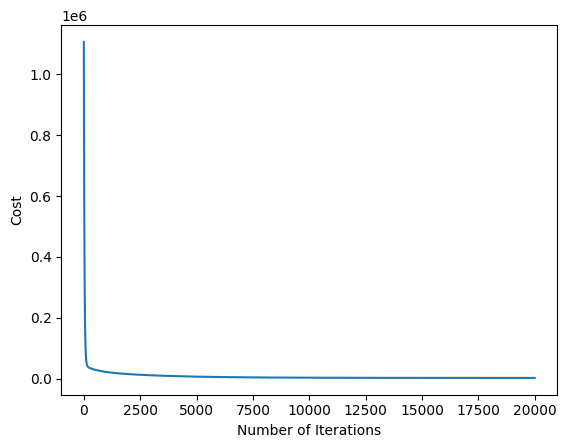

In [152]:
import matplotlib.pyplot as plt 

plt.plot(tracking_cost)
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")

In [153]:
# Error on Test Data Calculated with Custom Implementation of root_mean_squared_error
# Should match the error found by the sklearn.metrics mean_squared_error function below.

error_test_data = root_mean_squared_error(test_data, w, b)
print("Cost with Test Data: " + str(error_test_data))

Cost with Test Data: 80.7856034963151


In [154]:
# Error on Test Data Calculated with sklearn.metrics mean_squared_error function
# Should match the error found by the custom implementation of root_mean_squared_error above.

# Imports
from sklearn.metrics import mean_squared_error

# Getting List of House Price Predictions Using test_data Parameters and the Computed 
# Linear Regression Model
test_data_estimated_prices = np.array([])

for sample in test_data:
    test_data_estimated_prices = np.append(test_data_estimated_prices, np.dot(sample[0:-1], w) + b)

# Running the Root Mean Squared Error Function from sklearn on the actual house prices 
# from the test_data and the predicted house prices.
linear_rmse = mean_squared_error(test_data[:, -1], test_data_estimated_prices, squared = False)

linear_rmse

80.7856034963151

### Finding Estimated Prices

In [155]:
temp1 = np.column_stack([test_data[:, -1]])
temp2 = np.column_stack([test_data_estimated_prices])

price_estimates = np.concatenate((temp1, temp2), axis = 1)
print(price_estimates)

[[1571.         1632.60439139]
 [1486.         1344.16183696]
 [1506.         1329.90932399]
 [1097.         1058.49333132]
 [1764.         1886.11040155]
 [1208.         1198.80966939]
 [1470.         1518.73508942]
 [1768.         1779.9938556 ]
 [1654.         1594.83194441]
 [1029.         1030.96853477]
 [1120.         1120.7857296 ]
 [1150.         1191.79525591]
 [ 816.          835.35990081]
 [1040.         1096.52113693]
 [1392.         1369.47405559]
 [1603.         1534.21521061]
 [1215.         1290.74590288]
 [1073.         1006.6912177 ]
 [2599.         2702.17370786]
 [1431.         1339.83818843]
 [2090.         1952.56548287]
 [1790.         1693.2258882 ]
 [1484.         1461.88053797]
 [1040.         1096.52113693]
 [1431.         1352.41737208]
 [1159.         1265.17832562]
 [1547.         1721.28676368]
 [1983.         1833.13698305]
 [1056.         1157.32502298]
 [1180.         1197.73113821]
 [1358.         1290.74033526]
 [ 960.         1060.53620028]
 [1456. 

## Multivariable Linear Regression Library Implementation (from sklearn)

In [156]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

# sklearn Linear Regression model 1: Uses LinearRegression() model
# This model doesn't use gradient descent but instead uses an analytical method 
# to directly solve for the line of best fit. 

# linear_regression = LinearRegression()
# linear_regression.fit(training_data[:, 0:-1], training_data[:, -1])

# sklearn Linear Regression model 2: uses SGDRegressor() model
# This model uses stochastic gradient descent, and thus is directly comparable 
# to the custom implementation of multivariable linear regression included 
# within this file.

linear_regression = SGDRegressor(
    max_iter=1000000, alpha=0.001, random_state=42)
linear_regression.fit(training_data[:, 0:-1], training_data[:, -1])

SGDRegressor(alpha=0.001, max_iter=1000000, random_state=42)

In [157]:
w = linear_regression.coef_
b = linear_regression.intercept_

print("w parameter values: ")
print(w)
print("\n")

print("b parameter value: ")
print(b)
print("\n")

w parameter values: 
[ 559.83236704  265.73176107  397.20797922 1808.13863518]


b parameter value: 
[163.74215938]




### Error on Test Data

In [158]:
# Error on Test Data Calculated with Custom Implementation of root_mean_squared_error
# Should match the error found by the sklearn.metrics mean_squared_error function below.

error_test_data = root_mean_squared_error(test_data, w, b)
print("Cost with Test Data: " + str(error_test_data))

Cost with Test Data: [82.62135674]


In [159]:
from sklearn.metrics import mean_squared_error

test_data_estimated_prices = linear_regression.predict(test_data[:, 0:-1])

linear_rmse = mean_squared_error(test_data[:, -1], test_data_estimated_prices, squared = False)

linear_rmse

82.62135674226334

## Finding Estimated Prices

In [160]:
temp1 = np.column_stack([test_data[:, -1]])
temp2 = np.column_stack([test_data_estimated_prices])

price_estimates = np.concatenate((temp1, temp2), axis = 1)
print(price_estimates)

[[1571.         1624.83190901]
 [1486.         1339.83684332]
 [1506.         1328.56055824]
 [1097.         1072.38542947]
 [1764.         1883.96004251]
 [1208.         1203.42131995]
 [1470.         1532.14442088]
 [1768.         1770.10195327]
 [1654.         1587.63959956]
 [1029.         1039.29662661]
 [1120.         1146.69247395]
 [1150.         1192.90388126]
 [ 816.          850.2666608 ]
 [1040.         1109.21048377]
 [1392.         1362.64946718]
 [1603.         1545.94923824]
 [1215.         1287.45967298]
 [1073.         1001.90156806]
 [2599.         2671.85660633]
 [1431.         1335.28845155]
 [2090.         1947.19264206]
 [1790.         1700.13523802]
 [1484.         1479.32933038]
 [1040.         1109.21048377]
 [1431.         1354.88037417]
 [1159.         1265.01430426]
 [1547.         1728.56448317]
 [1983.         1833.63810797]
 [1056.         1161.72898415]
 [1180.         1185.05418079]
 [1358.         1290.8465869 ]
 [ 960.         1069.44738832]
 [1456. 